<b>Intro to Decision Trees</b>

In [30]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import sys

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston

In [32]:
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [33]:
X = df[['LSTAT']].values
y = boston_data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [59]:
tree = DecisionTreeRegressor(max_depth=2)

In [60]:
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [61]:
sort_idx = X.flatten().argsort()

Text(0, 0.5, 'MEDV')

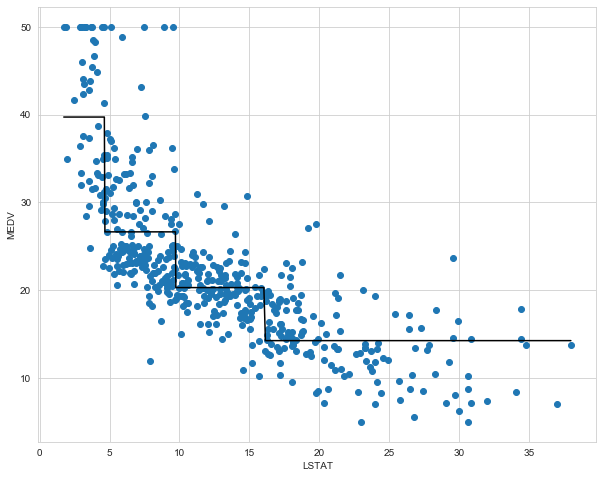

In [62]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

The Max depth  = 5 lead to overfitting of data

***

<b>Brief Introduction to Random Forest</b>

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [92]:
X = df.values

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=42)

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=42,
                              n_jobs=-1)

In [96]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [97]:
y_train_pred = forest.predict(X_train)

In [98]:
y_test_pred = forest.predict(X_test)

In [99]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_test, y_test_pred)))

MSE train: 1.8700, test: 9.3921


In [100]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
     format(r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))

R^2 train: 0.9787, test: 0.8740


****

<b>Brief Introduction to AdaBoost</b>

In [101]:
from sklearn.ensemble import AdaBoostRegressor

In [102]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                       n_estimators=500, random_state=42)

In [103]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=500,
                  random_

In [104]:
y_train_pred = ada.predict(X_train)

In [105]:
y_test_pred = ada.predict(X_test)

In [106]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_test, y_test_pred)))

MSE train: 4.6605, test: 13.4949


In [107]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
     format(r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))

R^2 train: 0.9470, test: 0.8189


***

<b>Feature Importance</b>

- According to Random Forest

In [108]:
forest.feature_importances_

array([0.03213849, 0.00166784, 0.00677542, 0.00131141, 0.01508521,
       0.4038535 , 0.01414013, 0.06280815, 0.00467201, 0.0120068 ,
       0.01833147, 0.0127986 , 0.41441098])

In [109]:
result = pd.DataFrame(forest.feature_importances_, df.columns)

In [110]:
result.columns = ['feature']

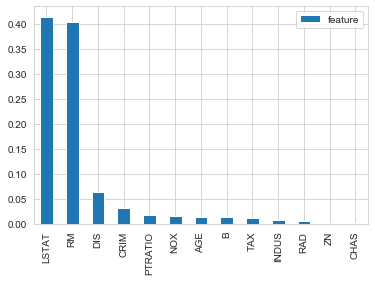

In [111]:
result.sort_values(by='feature', ascending=False).plot(kind='bar')

- According to AdaBoost

In [112]:
ada.feature_importances_

array([0.03104826, 0.00243815, 0.01083651, 0.00085548, 0.0371141 ,
       0.23589575, 0.00958776, 0.13743614, 0.01893706, 0.02188852,
       0.04185043, 0.02193283, 0.43017901])

In [116]:
result = pd.DataFrame(ada.feature_importances_, df.columns)

In [117]:
result.columns = ['feature']

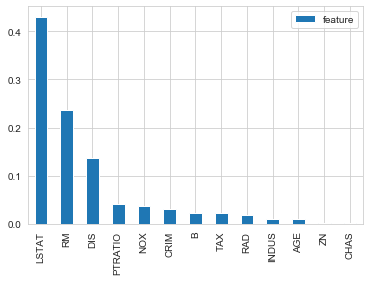

In [118]:
result.sort_values(by='feature', ascending=False).plot(kind='bar')